In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
sales_data = { 
    'Region': ['North', 'North', 'South', 'South', 'West', 'West'], 
    'Category': ['Electronics', 'Furniture', 'Electronics', 'Furniture', 'Electronics', 'Furniture'], 
    'Jan Sales': [10000, 12000, 15000, 17000, 11000, 13000], 
    'Feb Sales': [11000, 13000, 16000, 18000, 12000, 14000], 
    'Mar Sales': [12000, 13500, 17000, 18500, 13000, 14500]
      }

df_sales = pd.DataFrame(sales_data) 
print(df_sales)

  Region     Category  Jan Sales  Feb Sales  Mar Sales
0  North  Electronics      10000      11000      12000
1  North    Furniture      12000      13000      13500
2  South  Electronics      15000      16000      17000
3  South    Furniture      17000      18000      18500
4   West  Electronics      11000      12000      13000
5   West    Furniture      13000      14000      14500


In [12]:
df_sales.set_index(['Region', 'Category'], inplace=True) 
print(df_sales)

                    Jan Sales  Feb Sales  Mar Sales
Region Category                                    
North  Electronics      10000      11000      12000
       Furniture        12000      13000      13500
South  Electronics      15000      16000      17000
       Furniture        17000      18000      18500
West   Electronics      11000      12000      13000
       Furniture        13000      14000      14500


In [13]:
df_sales_reset = df_sales.reset_index() 
df_sales_melted = df_sales_reset.melt(id_vars=['Region', 'Category'], 
                                      var_name='Month', value_name='Sales')
print(df_sales_melted)

   Region     Category      Month  Sales
0   North  Electronics  Jan Sales  10000
1   North    Furniture  Jan Sales  12000
2   South  Electronics  Jan Sales  15000
3   South    Furniture  Jan Sales  17000
4    West  Electronics  Jan Sales  11000
5    West    Furniture  Jan Sales  13000
6   North  Electronics  Feb Sales  11000
7   North    Furniture  Feb Sales  13000
8   South  Electronics  Feb Sales  16000
9   South    Furniture  Feb Sales  18000
10   West  Electronics  Feb Sales  12000
11   West    Furniture  Feb Sales  14000
12  North  Electronics  Mar Sales  12000
13  North    Furniture  Mar Sales  13500
14  South  Electronics  Mar Sales  17000
15  South    Furniture  Mar Sales  18500
16   West  Electronics  Mar Sales  13000
17   West    Furniture  Mar Sales  14500


In [14]:
df_sales_melted['3-Month Avg Sales'] = df_sales_melted.groupby('Category')['Sales'].rolling(window=3).mean().reset_index(0, drop=True) 
print(df_sales_melted)

   Region     Category      Month  Sales  3-Month Avg Sales
0   North  Electronics  Jan Sales  10000                NaN
1   North    Furniture  Jan Sales  12000                NaN
2   South  Electronics  Jan Sales  15000                NaN
3   South    Furniture  Jan Sales  17000                NaN
4    West  Electronics  Jan Sales  11000       12000.000000
5    West    Furniture  Jan Sales  13000       14000.000000
6   North  Electronics  Feb Sales  11000       12333.333333
7   North    Furniture  Feb Sales  13000       14333.333333
8   South  Electronics  Feb Sales  16000       12666.666667
9   South    Furniture  Feb Sales  18000       14666.666667
10   West  Electronics  Feb Sales  12000       13000.000000
11   West    Furniture  Feb Sales  14000       15000.000000
12  North  Electronics  Mar Sales  12000       13333.333333
13  North    Furniture  Mar Sales  13500       15166.666667
14  South  Electronics  Mar Sales  17000       13666.666667
15  South    Furniture  Mar Sales  18500

In [15]:
df_sales_melted['Discounted Price'] = df_sales_melted['Sales'].apply(lambda x: x * 0.95)
print(df_sales_melted)

   Region     Category      Month  Sales  3-Month Avg Sales  Discounted Price
0   North  Electronics  Jan Sales  10000                NaN            9500.0
1   North    Furniture  Jan Sales  12000                NaN           11400.0
2   South  Electronics  Jan Sales  15000                NaN           14250.0
3   South    Furniture  Jan Sales  17000                NaN           16150.0
4    West  Electronics  Jan Sales  11000       12000.000000           10450.0
5    West    Furniture  Jan Sales  13000       14000.000000           12350.0
6   North  Electronics  Feb Sales  11000       12333.333333           10450.0
7   North    Furniture  Feb Sales  13000       14333.333333           12350.0
8   South  Electronics  Feb Sales  16000       12666.666667           15200.0
9   South    Furniture  Feb Sales  18000       14666.666667           17100.0
10   West  Electronics  Feb Sales  12000       13000.000000           11400.0
11   West    Furniture  Feb Sales  14000       15000.000000     

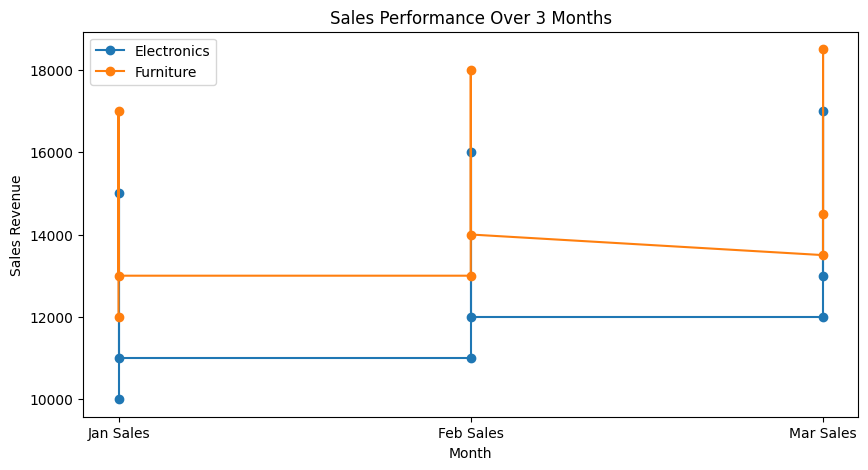

In [16]:
plt.figure(figsize=(10,5)) 
for category in df_sales_melted['Category'].unique(): 
    subset = df_sales_melted[df_sales_melted['Category'] == category] 
    plt.plot(subset['Month'], subset['Sales'], marker='o', label=category) 
plt.title("Sales Performance Over 3 Months") 
plt.xlabel("Month") 
plt.ylabel("Sales Revenue") 
plt.legend()
plt.show()